# Model 2 Capstone Project : Klasifikasi Gambar Menggunakan Convolutional Neural Networks (CNN)
## **Team & Project Details :** 
**Project Name** : WasteSnap <br>
**Project Themes** : Environment and Sustainability <br>
**Project Team Members** : <br>
Arthur Setiawan Waruwu (MC319D5Y2042) - Machine Learning Engineer - Universitas Sumatera Utara <br>		
Sakifa Indira Putri (MC319D5X2380) - Machine Learning Engineer - Universitas Sumatera Utara <br>
Diva Anggreini Harahap (MC319D5X2329) - Machine Learning Engineer - Universitas Sumatera Utara <br>		
Ahmad Wildan Naufi Raharjo (FC525D5Y0132) - Front End Back End Engineer - Politeknik Negeri Bamyuwangi <br>		
Achmad Naufal Falendra (FC525D5Y0162) - Front End Back End Engineer - Politeknik Negeri Banyuwangi <br>		
Achmad Yogi Firdani (FC525D5Y0124) - Front End Back End Engineer - Politeknik Negeri Banyuwangi <br>

# 1. Import Libraries
Langkah pertama yang akan kita lakukan adalah mengimpor berbagai libraries yang menyediakan fungsi-fungsi yang kita perlukan.

In [1]:
# Install tensorflow menggunakan perintah pip
!pip install tensorflow opencv-python Pillow tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is inc

In [2]:
# Import Library yang diperlukan
# Untuk pengolahan citra
import cv2
from PIL import Image, ImageEnhance  

# Untuk operasi array dan manipulasi data
import numpy as np
import pandas as pd
import os
import random
import shutil

# Untuk visualisasi
import matplotlib.pyplot as plt  # Matplotlib

# Untuk machine learning / deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split  
import tensorflowjs as tfjs
from tensorflow.keras.models import Model

2025-06-02 15:21:11.189813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748877671.532935      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748877671.625094      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Data Preparation
Persiapan data untuk klasifikasi gambar melibatkan pengolahan gambar sehingga dapat dimasukkan ke dalam model CNN.

## Data Loading
Pada bagian ini, kita akan memuat dataset gambar yang akan digunakan untuk train dan validation model. Dataset telah diupload ke kaggle dan akan dimuat langsung ke dalam notebook. Sebelum itu, kita akan menyalin dataset dari direktori `/kaggle/input/` yang sifatnya itu read-only ke direktori working `/kaggle/working/` yang dapat ditulis, jadi kita bisa melakukan berbagai operasi tanpa terbatas oleh izin akses read-only.

In [3]:
dataset_dir = '/kaggle/input/dataset-model-2/DatasetModel2'

working_dir = '/kaggle/working/dataset'

if not os.path.exists(dataset_dir):
    print(f"Direktori sumber {dataset_dir} tidak ditemukan!")
else:
    if os.path.exists(working_dir):
        print(f"Folder {working_dir} sudah ada, sedang dihapus...")
        shutil.rmtree(working_dir) 

    # menyalin dataset dari /kaggle/input ke /kaggle/working yang bisa ditulis
    try:
        shutil.copytree(dataset_dir, working_dir)
        print(f"Dataset berhasil disalin ke {working_dir}")
    except Exception as e:
        print(f"Gagal menyalin dataset: {e}")

Dataset berhasil disalin ke /kaggle/working/dataset


In [4]:
print(os.listdir('/kaggle/working/dataset/DatasetModel2'))

['Gak Ada Sampah', 'Ada Sampah']


In [5]:
def count_images_in_main_folders(base_dir, main_folders):
    total_images = 0  
    
    for main_folder in main_folders:
        main_path = os.path.join(base_dir, main_folder)
        if not os.path.isdir(main_path):
            print(f"Folder {main_folder} tidak ditemukan di {base_dir}")
            continue
        
        # Cari langsung file gambar di folder utama (tanpa masuk subfolder)
        images = [f for f in os.listdir(main_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        jumlah = len(images)
        print(f"Folder '{main_folder}' memiliki {jumlah} gambar.")
        total_images += jumlah
    
    print(f"\nTotal seluruh gambar langsung di folder utama: {total_images}")
    return total_images

fix_dir = '/kaggle/working/dataset/DatasetModel2'
main_folders = ['Ada Sampah', 'Gak Ada Sampah']

total = count_images_in_main_folders(fix_dir, main_folders)


Folder 'Ada Sampah' memiliki 783 gambar.
Folder 'Gak Ada Sampah' memiliki 433 gambar.

Total seluruh gambar langsung di folder utama: 1216


In [6]:
valid_extensions = {'.jpg', '.jpeg', '.png'}

def cek_ekstensi_tidak_valid(base_dir, main_folders):
    invalid_files = []
    
    for main_folder in main_folders:
        main_path = os.path.join(base_dir, main_folder)
        if not os.path.isdir(main_path):
            print(f"Folder {main_folder} tidak ditemukan di {base_dir}")
            continue
        
        # Cek langsung file di folder utama (main_folder)
        files = os.listdir(main_path)
        
        for f in files:
            ext = os.path.splitext(f)[1].lower()
            if ext not in valid_extensions:
                invalid_files.append(os.path.join(main_folder, f))
    
    if invalid_files:
        print("File dengan ekstensi tidak valid ditemukan:")
        for file_path in invalid_files:
            print(f" - {file_path}")
        print(f"\nTotal file dengan ekstensi tidak valid: {len(invalid_files)}")
    else:
        print("Semua file memiliki ekstensi gambar yang valid.")
        print("Total file tidak valid: 0")

# Contoh pemanggilan fungsi
fix_dir = '/kaggle/working/dataset/DatasetModel2'
main_folders = ['Ada Sampah', 'Gak Ada Sampah']

cek_ekstensi_tidak_valid(fix_dir, main_folders)


File dengan ekstensi tidak valid ditemukan:
 - Ada Sampah/025902700_1714054513-top-view-trash-cooking-concept__2_.webp
 - Ada Sampah/close-new-sheep-excrement-on-260nw-418544914.webp
 - Ada Sampah/93381.webp
 - Ada Sampah/93381 (1).webp
 - Gak Ada Sampah/finger tip.gif

Total file dengan ekstensi tidak valid: 5


Melihat dari output di atas, tampaknya masih ada sedikit gambar dengan ekstensi .webp yang tidak valid. Oleh karena itu, kita akan menghapus gambar-gambar ini terlebih dahulu sebelum membagi dataset.

In [7]:
def hapus_file_tidak_valid(base_dir, main_folders):
    deleted_files = []
    
    for main_folder in main_folders:
        main_path = os.path.join(base_dir, main_folder)
        if not os.path.isdir(main_path):
            print(f"Folder {main_folder} tidak ditemukan di {base_dir}")
            continue
        
        # Langsung cek file di folder utama main_folder
        files = os.listdir(main_path)
        
        for f in files:
            ext = os.path.splitext(f)[1].lower()
            if ext not in valid_extensions:
                file_path = os.path.join(main_path, f)
                try:
                    os.remove(file_path)
                    deleted_files.append(os.path.join(main_folder, f))
                except Exception as e:
                    print(f"Gagal menghapus {file_path}: {e}")
    
    if deleted_files:
        print("Berhasil menghapus file berikut dengan ekstensi tidak valid:")
        for file_path in deleted_files:
            print(f" - {file_path}")
        print(f"\nTotal file yang dihapus: {len(deleted_files)}")
    else:
        print("Tidak ditemukan file dengan ekstensi tidak valid untuk dihapus.")

# Contoh pemanggilan fungsi
fix_dir = '/kaggle/working/dataset/DatasetModel2'
main_folders = ['Ada Sampah', 'Gak Ada Sampah']

hapus_file_tidak_valid(fix_dir, main_folders)


Berhasil menghapus file berikut dengan ekstensi tidak valid:
 - Ada Sampah/025902700_1714054513-top-view-trash-cooking-concept__2_.webp
 - Ada Sampah/close-new-sheep-excrement-on-260nw-418544914.webp
 - Ada Sampah/93381.webp
 - Ada Sampah/93381 (1).webp
 - Gak Ada Sampah/finger tip.gif

Total file yang dihapus: 5


Pada tahap ini, telah dilakukan pengecekan dan penghapusan terhadap gambar-gambar yang tidak valid dalam dataset. Berdasarkan hasil pemeriksaan, sebanyak **5 gambar** dengan ekstensi tidak valid telah dihapus.

In [8]:
def cek_ekstensi_tidak_valid(base_dir, main_folders):
    invalid_files = []
    
    for main_folder in main_folders:
        main_path = os.path.join(base_dir, main_folder)
        if not os.path.isdir(main_path):
            continue
        
        # langsung cek file di folder utama (main_folder)
        files = os.listdir(main_path)
        
        for f in files:
            ext = os.path.splitext(f)[1].lower()
            if ext not in valid_extensions:
                invalid_files.append(os.path.join(main_folder, f))
    
    if invalid_files:
        print("Masih terdapat file dengan ekstensi tidak valid:")
        for file_path in invalid_files:
            print(f" - {file_path}")
    else:
        print("Tidak ditemukan file dengan ekstensi tidak valid lagi.")

fix_dir = '/kaggle/working/dataset/DatasetModel2'
main_folders = ['Ada Sampah', 'Gak Ada Sampah']

cek_ekstensi_tidak_valid(fix_dir, main_folders)


Tidak ditemukan file dengan ekstensi tidak valid lagi.


Nah, bisa dipastikan bahwa seluruh gambar dalam dataset ini sudah **valid** dan siap digunakan untuk pelatihan model.


--- Contoh gambar dari folder 'Ada Sampah' ---


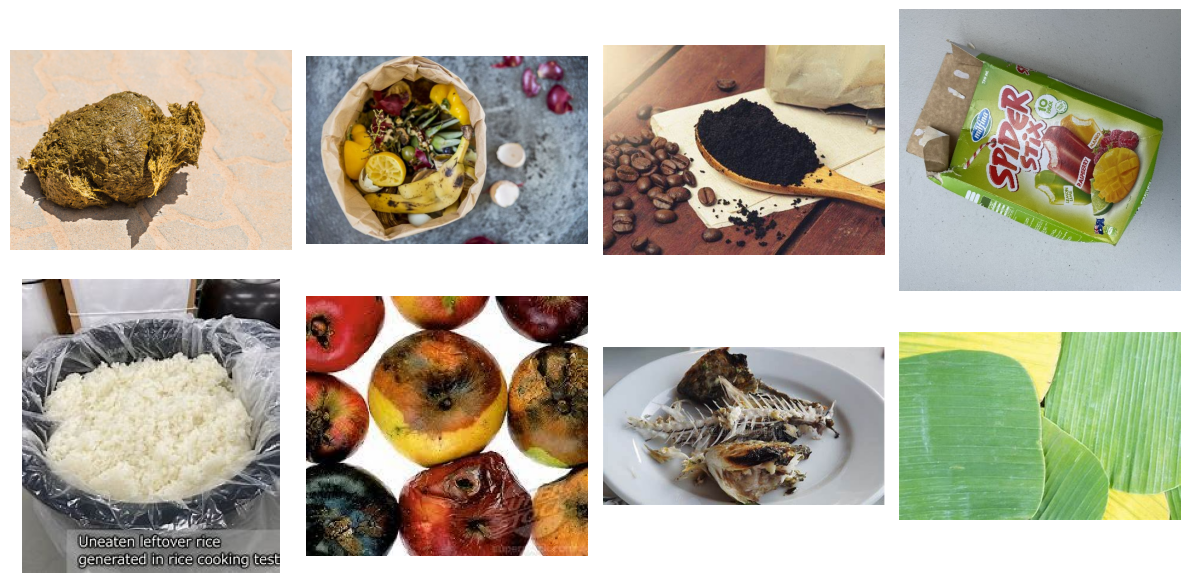


--- Contoh gambar dari folder 'Gak Ada Sampah' ---


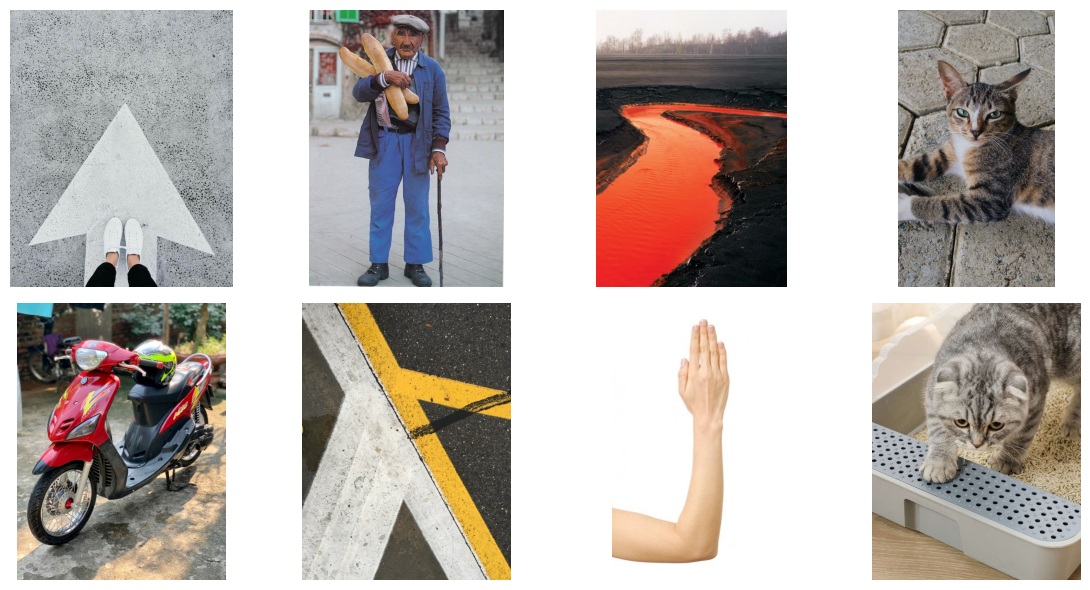

In [9]:
def show_sample_images(base_dir, main_folders):
    for main_folder in main_folders:
        main_path = os.path.join(base_dir, main_folder)
        if not os.path.isdir(main_path):
            print(f"Folder {main_folder} tidak ditemukan.")
            continue
        
        print(f"\n--- Contoh gambar dari folder '{main_folder}' ---")
        
        files = [f for f in os.listdir(main_path) if os.path.splitext(f)[1].lower() in valid_extensions]
        
        if len(files) == 0:
            print(f"Tidak ada gambar valid di folder '{main_folder}'.")
            continue
        
        images = []
        titles = []
        
        # Ambil maksimal contoh 8 gambar
        contoh_files = files[:8]
        
        for f in contoh_files:
            file_path = os.path.join(main_path, f)
            img = cv2.imread(file_path)
            if img is None:
                print(f"Gagal membaca gambar {file_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            titles.append(f"{main_folder} - {f}")
        
        cols = 4
        total = len(images)
        rows = (total + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
        axes = axes.flatten() if total > 1 else [axes]

        for i in range(len(axes)):
            if i < total:
                axes[i].imshow(images[i])
                # axes[i].set_title(titles[i], fontsize=10)
                axes[i].axis('off')
            else:
                axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()

# Contoh pemanggilan fungsi
fix_dir = '/kaggle/working/dataset/DatasetModel2'
main_folders = ['Ada Sampah', 'Gak Ada Sampah']

show_sample_images(fix_dir, main_folders)


## Split Dataset

In [10]:
fix_dir = '/kaggle/working/dataset/DatasetModel2'
output_dir = '/kaggle/working/Dataset-Split'

main_folders = ['Ada Sampah', 'Gak Ada Sampah']
splits = {
    'Train': 0.8,
    'Test': 0.1,
    'Val': 0.1
}

random.seed(42)

def create_dir_if_not_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)

def split_dataset(base_dir, output_dir, main_folders, splits):
   
    for split_name in splits.keys():
        for main_folder in main_folders:
            create_dir_if_not_exist(os.path.join(output_dir, split_name, main_folder))
    
    for main_folder in main_folders:
        main_path = os.path.join(base_dir, main_folder)
        if not os.path.isdir(main_path):
            print(f"Folder {main_folder} tidak ditemukan, skip.")
            continue
        
        
        files = [f for f in os.listdir(main_path) if f.lower().endswith(valid_extensions)]
        
        random.shuffle(files)
        
        n_total = len(files)
        n_train = int(n_total * splits['Train'])
        n_test = int(n_total * splits['Test'])
        n_val = n_total - n_train - n_test
        
        train_files = files[:n_train]
        test_files = files[n_train:n_train+n_test]
        val_files = files[n_train+n_test:]
        
        for split_name, file_list in zip(['Train', 'Test', 'Val'], [train_files, test_files, val_files]):
            output_folder = os.path.join(output_dir, split_name, main_folder)
            create_dir_if_not_exist(output_folder)
            
            for file_name in file_list:
                src_path = os.path.join(main_path, file_name)
                dst_path = os.path.join(output_folder, file_name)
                shutil.copy2(src_path, dst_path)
        
        print(f"{main_folder}: total={n_total}, train={len(train_files)}, test={len(test_files)}, val={len(val_files)}")

# Jalankan split
split_dataset(fix_dir, output_dir, main_folders, splits)

TypeError: endswith first arg must be str or a tuple of str, not set

Dapat dilihat output diatas merupakan hasil split data dengan rasio Train 80, Test 10, dan Val 10

In [ ]:
# menghitung total gambar
def count_images_in_split(output_dir, main_folders, splits):
    print("\nTotal jumlah gambar per split:")
    for split_name in splits.keys():
        total_count = 0
        split_path = os.path.join(output_dir, split_name)
        for main_folder in main_folders:
            main_path = os.path.join(split_path, main_folder)
            if not os.path.isdir(main_path):
                continue
            
            # Langsung hitung file gambar di main_folder (tanpa subfolder)
            files = [f for f in os.listdir(main_path) if f.lower().endswith(valid_extensions)]
            count = len(files)
            total_count += count
        print(f"{split_name}: {total_count} gambar")

# Panggil fungsi hitung
count_images_in_split(output_dir, main_folders, splits)


## Data Preprocessing

In [ ]:
# Augmentasi, Resize dan Normalisasi untuk folder train
from skimage import exposure

# path folder train setelah split
train_folder = os.path.join(output_dir, 'Train')

train_datagen = ImageDataGenerator(
    rescale=1./255,               # normalisasi
    rotation_range=30,            # rotasi
    width_shift_range=0.2,        # translasi horizontal
    height_shift_range=0.2,       # translasi vertikal
    shear_range=0.3,              # shearing
    zoom_range=0.3,               # zoom
    horizontal_flip=True,         # flip horizontal
    fill_mode='nearest',
    channel_shift_range=50,       # perpindahan warna channel
    ##preprocessing_function=contrast_stretching  # fungsi contrast stretching
)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),  # resize gambar ke ukuran 224x224
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    seed=42
)

print("Folder 'train' berhasil diproses dengan ImageDataGenerator.")
print(f"Jumlah kelas: {len(train_generator.class_indices)}")

In [ ]:
# Normalisasi untuk folder Test dan Validation
test_folder = os.path.join(output_dir, 'Test')
val_folder = os.path.join(output_dir, 'Val')

val_test_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_test_datagen.flow_from_directory(
    val_folder,
    batch_size=32,
    target_size=(224, 224),  # ini juga harus sama
    class_mode='categorical',
    shuffle=False,
    color_mode= 'rgb'
)

test_generator = val_test_datagen.flow_from_directory(
    test_folder,
    batch_size=32,
    target_size=(224, 224),  # ini juga harus sama
    class_mode='categorical',
    shuffle=False,
    color_mode= 'rgb'
)

# Output informasi sukses untuk validation
print("Folder 'validation' berhasil diproses dengan ImageDataGenerator.")
print(f"Jumlah kelas (val): {len(val_generator.class_indices)}")

# Output informasi sukses untuk test
print("Folder 'test' berhasil diproses dengan ImageDataGenerator.")
print(f"Jumlah kelas (test): {len(test_generator.class_indices)}")

In [ ]:
print(f"Mapping kelas: {train_generator.class_indices}")
print(f"Mapping kelas (val): {val_generator.class_indices}")
print(f"Mapping kelas (test): {test_generator.class_indices}")

# **3. Modelling**

In [ ]:
import numpy as np
from collections import Counter

# Menghitung jumlah data per label (di folder train)
label_counts = Counter(train_generator.classes)

# Mengambil mapping label
label_map = train_generator.class_indices
label_map_inv = {v: k for k, v in label_map.items()}

# Menampilkan hasil
for label_index, count in label_counts.items():
    print(f"{label_map_inv[label_index]}: {count} gambar")

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ambil semua label dari generator
train_labels = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Input layer
input_tensor = Input(shape=(224, 224, 3))

# Base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)
print("Jumlah total layer:", len(base_model.layers))

# Set semua layer dapat dilatih terlebih dahulu
base_model.trainable = True

# Bekukan semua layer kecuali 50 terakhir
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Tambahkan custom layers di atas base model
x = base_model.output
x = Conv2D(8, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output_tensor = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Buat model final
model = Model(inputs=input_tensor, outputs=output_tensor)

# Lihat arsitektur model
model.summary()

In [ ]:

# Callback ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,             # jika val_loss tidak membaik selama 5 epoch, training stop
    restore_best_weights=True,
    verbose=1
)

# Compile dan fit dengan epochs 50 dan callbacks
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[reduce_lr, early_stop],
    class_weight=class_weights_dict if class_weights_dict else None
)


# **4. Evaluasi Model dan Visualisasi**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# ===== 1. VISUALISASI =====
# Menggabungkan history1 dan history2 jika mau, tapi di sini hanya history2
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()

In [ ]:
# Ambil prediksi model
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **5. Konversi Model**

In [ ]:
model.save("model_AdaSampah_GakAdaSampah.h5")

In [ ]:
from IPython.display import FileLink
FileLink('model_AdaSampah_GakAdaSampah.h5')  # klik link yang muncul untuk download

In [ ]:
!pip install tf2onnx

In [ ]:
import tf2onnx
import tensorflow as tf

# Konversi model ke ONNX
spec = (tf.TensorSpec((None, 224, 224, 3), tf.float32, name="input"),)
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13)

# Simpan model ONNX
with open("model_AdaSampah_GakAdaSampah.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())



In [ ]:
from IPython.display import FileLink
FileLink('model_AdaSampah_GakAdaSampah.onnx')


In [ ]:
!pip install tensorflowjs


# **6. Inference**

In [ ]:
from tensorflow.keras.models import load_model

# Load model
model_path = '/kaggle/working/model_AdaSampah_GakAdaSampah.h5'
model = load_model(model_path)

class_labels = ['Ada Sampah', 'Gak Ada Sampah']

def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Gagal membaca gambar dari {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # shape (1,224,224,3)
    return img

def predict_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = preprocess_image(path)
            images.append(img)
        except Exception as e:
            print(f"Gagal memproses {path}: {e}")
    if len(images) == 0:
        raise ValueError("Tidak ada gambar valid yang diproses untuk prediksi.")
    
    # Gabungkan list array (shape (1,224,224,3)) jadi array shape (N,224,224,3)
    images = np.vstack(images)  
    print(f"Jumlah gambar untuk prediksi: {images.shape[0]}")
    
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)
    confidences = preds[np.arange(len(preds)), pred_classes]
    pred_labels = [class_labels[i] for i in pred_classes]
    return pred_labels, confidences

def plot_predictions(image_paths, pred_labels, confidences, max_images=9):
    plt.figure(figsize=(12, 12))
    for i, (img_path, label, conf) in enumerate(zip(image_paths[:max_images], pred_labels[:max_images], confidences[:max_images])):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(f"{label}\nConfidence: {conf:.2f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Contoh folder yang berisi banyak gambar
folder_path = '/kaggle/input/datasetttttt/dataset-bukti'  # ganti dengan folder yang kamu punya

# Ambil list semua file gambar valid
valid_extensions = ('.jpg', '.jpeg', '.png')
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]

# Prediksi semua gambar
pred_labels, confidences = predict_images(image_files)

# Tampilkan sampel hasil prediksi 9 gambar pertama
plot_predictions(image_files, pred_labels, confidences, max_images=9)
